### Name : Gede Indra Adi Brata
### NIM  : 225150200111006

# UAP Self Organizing Maps

SOM merupakan model JST yang melatih data dengan pendekatan unsupervised learning. Pada praktikum, penentuan jumlah cluster didasarkan pada nilai  Silhouette untuk mengukur homogenitas cluster. Pada UAP kali ini, implementasikan penentuan jumlah cluster yang optimal dengan elbow method.

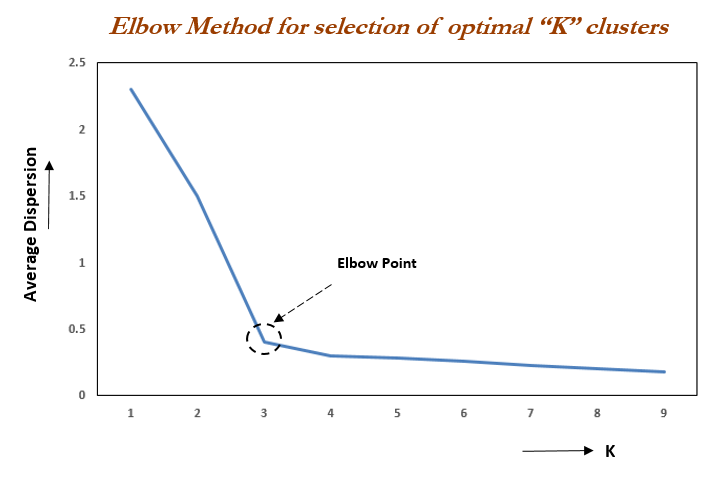

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
def som(data_points, learning_rate, decay_factor, max_epochs, num_clusters):
    centroids = np.random.uniform(size=(num_clusters, len(data_points[0])))
    current_epoch = 0
    cluster_labels = []

    while current_epoch < max_epochs:
        for data_point in data_points:
            distances = [np.sum((centroid - data_point) ** 2) for centroid in centroids]
            closest_centroid_index = np.argmin(distances)
            centroids[closest_centroid_index] += learning_rate * (data_point - centroids[closest_centroid_index])
        
        learning_rate *= decay_factor
        current_epoch += 1

    for data_point in data_points:
        distances = [np.sum((centroid - data_point) ** 2) for centroid in centroids]
        closest_centroid_index = np.argmin(distances)
        cluster_labels.append(closest_centroid_index)

    return centroids, cluster_labels

def plot_clusters(data_points, cluster_labels, centroids):
    colors = 'rgbcmyk'
    for data_point, label in zip(data_points, cluster_labels):
        plt.plot(data_point[0], data_point[1], colors[label] + '.')
    plt.plot(centroids[:, 0], centroids[:, 1], 'kx') 
    
def draw(X, target, centroids) :
    colors = 'rgbcmyk'

    for x, label in zip(X, target) :
        plt.plot(x[0], x[1], colors[label] + '.')

    plt.plot(centroids[:, 0], centroids[:, 1], 'kx')

In [3]:
def elbow_method(data_points, max_cluster):
    distortion_values = []
    for num_cluster in range(1, max_cluster + 1):
        # Nilai learning rate, decay factor, dan max epoch yang digunakan berdasarkan hasil tuning
        centroids, cluster_labels = som(data_points, learning_rate=0.3, decay_factor=0.7, max_epochs=100, num_clusters=num_cluster)
        distortion_values.append(sum([np.linalg.norm(data_points[i] - centroids[cluster_labels[i]]) for i in range(len(data_points))]))
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_cluster + 1), distortion_values, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for SOM')
    plt.show()

    second_derivative = np.diff(distortion_values, 2)
    best_k = np.argmax(second_derivative) + 2 

    return best_k

In [4]:
# Hanya gunakan kolom A1 - A14 dan drop kolom CustomerID dan Class
import pandas as pd
data = pd.read_csv('Data SOM.csv')
data = data.drop(columns=['CustomerID', 'Class'])
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12


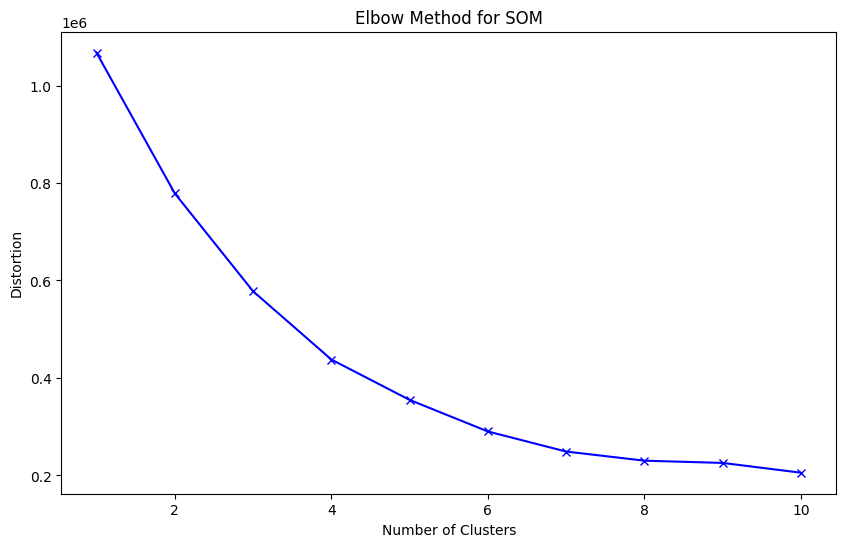

Best K: 2


In [5]:
# Tentukan jumlah cluster optimal dengan Elbow Method
best_k = elbow_method(data.values, max_cluster=10)
print(f'Best K: {best_k}')

Learning Rate: 0.1, Decay Factor: 0.5, Max Epochs: 100, Silhouette Score: 0.9659886262121283
Learning Rate: 0.1, Decay Factor: 0.5, Max Epochs: 200, Silhouette Score: 0.9659886262121283
Learning Rate: 0.1, Decay Factor: 0.5, Max Epochs: 300, Silhouette Score: 0.9659886262121283
Learning Rate: 0.1, Decay Factor: 0.6, Max Epochs: 100, Silhouette Score: 0.9698956389897826
Learning Rate: 0.1, Decay Factor: 0.6, Max Epochs: 200, Silhouette Score: 0.9698956389897826
Learning Rate: 0.1, Decay Factor: 0.6, Max Epochs: 300, Silhouette Score: 0.9698956389897826
Learning Rate: 0.1, Decay Factor: 0.7, Max Epochs: 100, Silhouette Score: 0.9698956389897826
Learning Rate: 0.1, Decay Factor: 0.7, Max Epochs: 200, Silhouette Score: 0.9698956389897826
Learning Rate: 0.1, Decay Factor: 0.7, Max Epochs: 300, Silhouette Score: 0.9698956389897826
Learning Rate: 0.2, Decay Factor: 0.5, Max Epochs: 100, Silhouette Score: 0.9698956389897826
Learning Rate: 0.2, Decay Factor: 0.5, Max Epochs: 200, Silhouette Sco

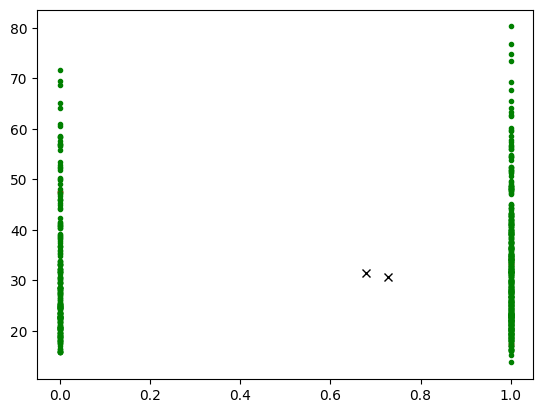

In [6]:
# Lakukan pelatihan dan pengujian data dengan memanggil fungsi SOM dan dengan best_k sebagai parameter cluster
# Lakukan tuning parameter untuk menghasilkan nilai silhouette yang paling optimal

X = data.values

learning_rates = [0.1, 0.2, 0.3]
decay_factors = [0.5, 0.6, 0.7]
max_epochs = [100, 200, 300]

best_params = {}


for lr in learning_rates:
    for df in decay_factors:
        for me in max_epochs:
            centroids, labels = som(X, learning_rate=lr, decay_factor=df, max_epochs=me, num_clusters=best_k)
            silhouette = silhouette_score(data, labels)
            print(f'Learning Rate: {lr}, Decay Factor: {df}, Max Epochs: {me}, Silhouette Score: {silhouette}')
            
            if silhouette > best_params.get('silhouette', -1):
                best_params = {'learning_rate': lr, 'decay_factor': df, 'max_epochs': me, 'silhouette': silhouette}
            
            

best_params = {k: v for k, v in sorted(best_params.items(), key=lambda item: item[1], reverse=True)}
print('Best parameters:', best_params)


# Train SOM with the optimal number of clusters
centroids, labels = som(X, learning_rate=best_params['learning_rate'], decay_factor=best_params['decay_factor'], max_epochs=best_params['max_epochs'], num_clusters=best_k)

# Calculate Silhouette Score
silhouette = silhouette_score(data, labels)
print('Silhouette score:', silhouette)

draw(X, labels, centroids)

# Analisis

1. Jelaskan konsep Elbow Method di SOM

Elbow Method adalah teknik yang digunakan untuk menentukan jumlah cluster optimal dalam algoritma Self-Organizing Map (SOM) atau metode clustering lainnya. Metode ini memanfaatkan hubungan antara jumlah cluster dan nilai distortion atau inertia, yaitu rata-rata jarak kuadrat antara setiap data dengan centroid clusternya (euclidian). Proses dari metode elbow method ini  melibatkan algoritma SOM untuk berbagai jumlah klaster, lalu menghitung dan memplot nilai distortion untuk setiap jumlah cluster. Grafik yang dihasilkan biasanya menunjukkan penurunan nilai distortion yang signifikan pada awalnya, tetapi kemudian melambat setelah titik tertentu, membentuk pola seperti "siku" (elbow). Titik yang mana terdapat perubahan laju penurunan tersebut terjadi dianggap sebagai jumlah cluster yang optimal. Dalam konteks SOM, Elbow Method membantu mengidentifikasi jumlah cluster dari data yang sesuai, sehingga menghasilkan clustering yang lebih efisien dan optimal.

2. Berapa jumlah cluster paling optimal yang dihasilkan melalui Elbow Method?

Pada proses di atas di dapatkan jumlah cluster optimal adalah 2 cluster. Dimana terbentuk siku pada titik 2 cluster.

3. Jelaskan pengaruh lrate, b, max_epoch, dan n_cluster pada tuning parameter yang anda lakukan

Dalam proses tuning parameter pada Self-Organizing Map (SOM), empat parameter utama memiliki pengaruh yang signifikan terhadap kualitas clustering, sebagaimana diukur melalui skor Silhouette:

- Learning Rate (lrate): Parameter ini mengontrol seberapa besar langkah pembaruan centroid terhadap data yang diproses. Nilai learning rate yang terlalu tinggi dapat menyebabkan centroid melampaui posisi optimalnya, sehingga menghasilkan clustering yang tidak stabil. Sebaliknya, nilai yang terlalu rendah dapat memperlambat konvergensi dan membuat model sulit mencapai optimalitas dalam jumlah epoch yang ditentukan.

- Decay Factor (b): Parameter ini menentukan tingkat pengurangan learning rate seiring bertambahnya epoch. Faktor decay yang sesuai membantu model menyesuaikan pembaruan centroid secara halus pada tahap akhir pelatihan, sehingga menghasilkan clustering yang lebih akurat. Namun, decay yang terlalu cepat dapat mengakibatkan pembelajaran terhenti sebelum model sepenuhnya beradaptasi dengan data.

- Max Epoch: Jumlah epoch menentukan seberapa banyak iterasi yang digunakan untuk memperbarui centroid. Dengan epoch yang lebih tinggi, model memiliki kesempatan lebih besar untuk mencapai konvergensi yang optimal. Namun, terlalu banyak epoch dapat menyebabkan waktu komputasi yang lama tanpa peningkatan signifikan pada kualitas klasterisasi.

- Number of Clusters (n_cluster): Parameter ini secara langsung memengaruhi jumlah centroid dalam model SOM. Pemilihan jumlah cluster yang optimal sangat penting, karena terlalu sedikit cluster dapat menyebabkan informasi hilang (underfitting), sementara terlalu banyak cluster dapat menghasilkan pembagian data yang berlebihan (overfitting).

Melalui tuning parameter ini, kombinasi optimal dari learning rate, decay factor, dan max epoch ditemukan dengan mencoba berbagai nilai dan memilih kombinasi yang memberikan skor Silhouette tertinggi. Kombinasi ini mencerminkan parameter yang memberikan keseimbangan terbaik antara stabilitas pembaruan centroid dan akurasi clustering.